# **Sentiment Analysis on Tweet about War of Ukraine Against Russia**


<center>Date: 01/11/2022</center>


**Background**

Sentiment Analysis is a branch of Natural Language Processing (NLP) that allows us to determine algorithmically whether a statement or document is "positive" or "negative".

Sentiment analysis is a technology of increasing importance in the modern society as it allows individuals, organizations and governments to detect trends in public opinion by analyzing social media content. Keeping abreast of socio-political developments is especially important during periods of war and political instability, such as year 2022, when russia started the unprovoked war in Ukraine. Politicians, media and organizations can benefit from sentiment analysis by making appropriate changes to their campaigning, news coverage, and strategies respectively.

The purpose of this project is to compute the sentiment of text information - in our case, social media posts/tweets posted recently on the war of Ukraine against russia - and answer the research question: "What can public opinion tell us about the russia's war against Ukraine in 2022?" The goal is to essentially use sentiment analysis on Twitter, Reddit, Facebook and other social media platforms to get insights into the war. For this project, you are encouraged to use data from multiple sources. You are encouraged to develop your sentiment analysis models and compare those to existing models available as Python libraries or on-Cloud.

In addition, based on your sentiment analysis results (especially looking at posts/tweets with negative and positive sentiment, as posts/tweets with neutral sentiment are less informative), you will need to identify factors/reasons/topics that drive sentiment. Consider that you have been hired by a government agency or a news outlet as a consultant to gauge how Ukraine and the war is viewed internationally and suggest actions that could improve Ukraine's image. Your task is to analyze social media posts/tweets and to identify key factors/reasons/topics from those in order to determine how Ukraine is perceived on the international scene and to write a report presenting your findings and your suggestions to the Ukrainian government and international NGOs for changes in their current portfolio of strategies that are projected to have a positive impact on Ukraine's international presence and image. If necessary, you may compliment your analysis of posts/tweets by analyzing news articles from traditional media.

When making your conclusions and recommendations be careful to distinguish sentiment about Ukraine, sentiment about Russia, sentiment about the war, sentiment about opinions of Elon Musk, etc.

## **Import Package**

In [1]:
import warnings
# Kill warning
warnings.simplefilter("ignore")

import pandas as pd
# !pip install matplotlib==3.5.0
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgbm
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import Word

# Part 2 Usage
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Part 3 Usage
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Part 4 Usage

# Properties setting
plt.style.use('ggplot')

## **Load Data**

In [2]:
# load data
data = pd.read_csv('https://media.githubusercontent.com/media/SimonHuang135/MIE1624CP/master/sentiment_analysis.csv')
data

ID                                               text  label
0       7.680980e+17  Josh Jenkins is looking forward to TAB Breeder...      1
1       7.680980e+17  RT @MianUsmanJaved: Congratulations Pakistan o...      1
2       7.680980e+17  RT @PEPalerts: This September, @YESmag is taki...      1
3       7.680980e+17  RT @david_gaibis: Newly painted walls, thanks ...      1
4       7.680980e+17  RT @CedricFeschotte: Excited to announce: as o...      1
...              ...                                                ...    ...
550386  8.046170e+17  @goddesses_o I can't stop watching her...mm. M...      0
550387  8.046180e+17  Poor old Tom Odell doesn't look like he would ...      0
550388  8.046180e+17  #antsmasher I smashed  7 ants in this awesome ...      1
550389  8.046180e+17  @LizHudston @KymWyllie @Evasmiless @meanBok @l...      1
550390  8.046190e+17  Bixbeat Mixtape Vol.2 is here with great artis...      1

[550391 rows x 3 columns]

## **TO DO:**
Finish the following four parts based on your data analytics:

## **Part 1 - Sentiment modeling:**
A dataset of classified tweets to train your sentiment analysis models is provided. The sentiment_analysis.csv file contains tweets that have had their sentiments already analyzed and recorded as binary values 0 (negative) and 1 (positive). Each line is a single tweet, which may contain multiple sentences despite their brevity. The comma-separated fields of each line are:

$$
\begin{array}{lll}0 & \text { ID } & \text { Tweet ID } \\ 1 & \text { text } & \text { the text of the tweet } \\ 2 & \text { label } & \text { the polarity of each tweet }(0=\text { negative sentiment, } 1=\text { positive sentiment) }\end{array}
$$

The dataset has been collected directly from the web, so it may contain html tags, hashtags, and user tags. You may use this dataset or any other dataset from the web to train and validate your sentiment models.

Prepare the data using TF-IDF or Bag of Words (word frequency) as your feature engineering technique. Train at least four classification algorithms on the training data: logistic regression, kNN, Naive Bayes, SVM, decision trees, Random Forest, XGBoost, and Deep Learning model, where each tweet is considered a single observation/example, and the target variable is the sentiment value, which is either positive or negative. Evaluate each model on the test data to obtain accuracy measures. Perform hyperparameter tuning and cross-validation.
Select the trained model with the best performance to use in Part 2.

- Prepare the data using TF-IDF or Bag of Words (word frequency) as your feature engineering technique. 
- Train at least four classification algorithms on the training data: logistic regression, kNN, Naive Bayes, SVM, decision trees, Random Forest, XGBoost, and Deep Learning model, where each tweet is considered a single observation/example, and the target variable is the sentiment value, which is either positive or negative. 
- Evaluate each model on the test data to obtain accuracy measures. Perform hyperparameter tuning and cross-validation.
- Select the trained model with the best performance to use in Part 2.

### 1.0 EDA and Data Cleaning

NaN value in data: 0
label count:
1    371341
0    179050
Name: label, dtype: int64


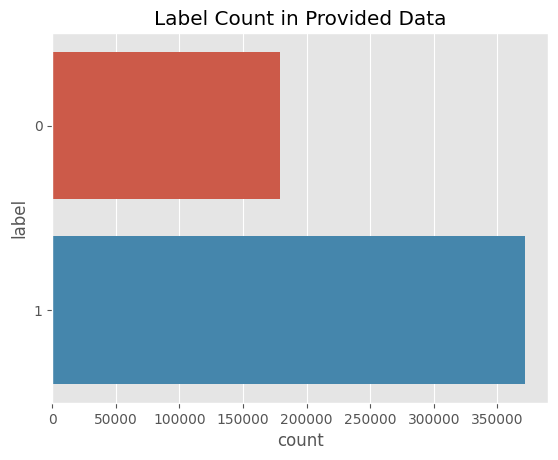

In [3]:
# check NaN
print('NaN value in data:', data.isna().sum().sum())
# label count
print('label count:')
print(data.label.value_counts())
sns.countplot(x=None, y= 'label', data=data)
plt.title('Label Count in Provided Data')
plt.show()

- Function to process stopwords

In [4]:
def process_stopwords(df, column):
    # Convert all text to lower cases
    df[column] = df[column].apply(lambda x: " ".join(x.lower()for x in x.split()))
    # Delete all tabulation, spaces, and new lines
    df[column] = df[column].str.replace('[^\w\s]',' ')
    # Delete all numericals
    df[column] = df[column].str.replace('\d+', '')
    # Delete all RT
    df[column] = df[column].str.replace('rt', '')
    # Delete all @
    df[column] = df[column].str.replace('@', '')
    # Delete all #
    df[column] = df[column].str.replace('#', '')
    # Delete nltk's defined stop words
    stop = stopwords.words('english')
    df[column] = df[column].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # Lemmatize text
    df[column] = df[column].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    return df

In [5]:
data.text = data.text.map(lambda x:x.split(' http')[0]) # get rid of website link
data = process_stopwords(data, 'text')
data

ID                                               text  label
0       7.680980e+17  josh jenkins looking forward tab breeder crown...      1
1       7.680980e+17  mianusmanjaved congratulation pakistan becomin...      1
2       7.680980e+17  pepales september yesmag taking maine mendoza ...      1
3       7.680980e+17  david_gaibis newly painted wall thanks million...      1
4       7.680980e+17  cedricfeschotte excited announce july feschott...      1
...              ...                                                ...    ...
550386  8.046170e+17                       goddesses_o stop watching mm      0
550387  8.046180e+17  poor old tom odell look like would know wrong ...      0
550388  8.046180e+17         antsmasher smashed ant awesome game hjfjfi      1
550389  8.046180e+17  lizhudston kymwyllie evasmiless meanbok linddy...      1
550390  8.046190e+17      bixbeat mixtape vol great aiste join movement      1

[550391 rows x 3 columns]

### 1.1 Apply TF-IDF as feature engineering technique, Train four classification algorithms on the training data: LGBM, kNN, Naive Bayes, XGBoost, logistic regression.

#### 1.1.2 Split data to training and test set

In [6]:
# data split
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

#### 1.1.3 Apply TF-IDF to vectorise training data, then tuning and cross validating model with GridSearchCV (5 fold)

- Function of Hyperparameter tuning and Cross Validation

In [7]:
def gridsearchcv_model(train_x, train_y, tune_model, hyperparameters_dict, performance_measures):
    # grid init and fit data into grid
    grid = GridSearchCV(tune_model, hyperparameters_dict, cv = StratifiedKFold(n_splits=5), scoring = performance_measures, return_train_score = True, n_jobs = -1)
    grid.fit(train_x,train_y)
    # show best neg_log_loss score
    print('best {} score: {}'.format(performance_measures, grid.best_score_))
    print('best hyperparameters:', grid.best_params_)
    print(grid.best_estimator_)
    best_para = grid.best_params_
    return best_para

- LGBM tuning

In [8]:
# lgbm model for tuning
text_lgbm = lgbm.LGBMClassifier(n_estimators=300, random_state=0, n_jobs=-1)
# data vectorising
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(X_train)
train_y = y_train
# hyperparameters
learning_rate = [0.1, 0.2, 0.3] # 0.1
hyperparameters_dict = dict(learning_rate = learning_rate)
# performance measures
performance_measures = 'accuracy'
# tuning lgbm
lgbm_best_para = gridsearchcv_model(train_x, train_y, text_lgbm, hyperparameters_dict, performance_measures)

best accuracy score: 0.9650695150176929
best hyperparameters: {'learning_rate': 0.3}
LGBMClassifier(learning_rate=0.3, n_estimators=300, random_state=0)


- Naive Bayes tuning

In [9]:
# naive bayes model for tuning
text_naive_bayes = MultinomialNB()
# data vectorising
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(X_train)
train_y = y_train
# hyperparameters
alpha = [0.01, 0.05, 0.1, 0.5, 1.0] # 1.0
hyperparameters_dict = dict(alpha = alpha)
# performance measures
performance_measures = 'accuracy'
# tuning lgbm
naive_bayes_best_para = gridsearchcv_model(train_x, train_y, text_naive_bayes, hyperparameters_dict, performance_measures)

best accuracy score: 0.9195386702392401
best hyperparameters: {'alpha': 0.5}
MultinomialNB(alpha=0.5)


- XGBoost tuning

In [10]:
# xgboost model for tuning
text_xboost = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# data vectorising
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(X_train)
train_y = y_train
# hyperparameters
eta = [0.1, 0.3, 0.6] # 0.3
hyperparameters_dict = dict(eta = eta)
# performance measures
performance_measures = 'accuracy'
# tuning lgbm
xboost_best_para = gridsearchcv_model(train_x, train_y, text_xboost, hyperparameters_dict, performance_measures)

best accuracy score: 0.9427678103557964
best hyperparameters: {'eta': 0.6}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.6,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.600000024,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)


- Logistic Regression tuning

In [11]:
# logistic regression model for tuning
text_logistic = LogisticRegression(solver='newton-cg', penalty='l2', class_weight='balanced', random_state=0)
# data vectorising
vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(X_train)
train_y = y_train
# hyperparameters
C = [0.5, 1.0, 1.5, 2] # 1.0
hyperparameters_dict = dict(C = C)
# performance measures
performance_measures = 'accuracy'
# tuning lgbm
logistic_best_para = gridsearchcv_model(train_x, train_y, text_logistic, hyperparameters_dict, performance_measures)

best accuracy score: 0.9629326299183217
best hyperparameters: {'C': 2}
LogisticRegression(C=2, class_weight='balanced', random_state=0,
                   solver='newton-cg')


### 1.2 Evaluate each model on the test data to obtain accuracy measures.

#### 1.2.1 Optimal LGBM evaluation on test data

In [12]:
lgbm_best_para

{'learning_rate': 0.3}

0.9649452183009415
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     59087
           1       0.98      0.97      0.97    122543

    accuracy                           0.96    181630
   macro avg       0.96      0.96      0.96    181630
weighted avg       0.97      0.96      0.97    181630



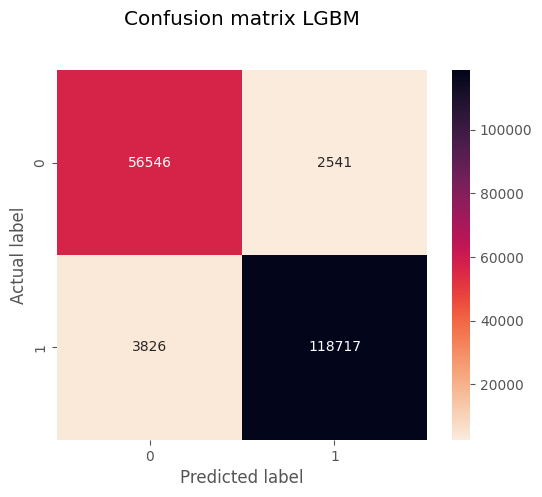

In [13]:
# LGBM model pipeline
text_lgbm = Pipeline([('tfidf', TfidfVectorizer()), # vectorise
                      ('lgbm_clf', lgbm.LGBMClassifier(learning_rate=0.3, n_estimators=300, random_state=0, n_jobs=-1)), # model
                     ])
# fit data
text_lgbm.fit(X_train, y_train)
# make prediction
predictions_lgbm = text_lgbm.predict(X_test)
# overall accuracy, recall, f1, precision, roc
print(metrics.accuracy_score(y_test, predictions_lgbm))
print(metrics.classification_report(y_test, predictions_lgbm))
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, predictions_lgbm)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
# confusion matrix
cnf_matrix_lgbm = metrics.confusion_matrix(y_test, predictions_lgbm)
sns.heatmap(pd.DataFrame(cnf_matrix_lgbm), cmap='rocket_r', annot=True, cbar=True, square=True, fmt='g')
plt.title('Confusion matrix LGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 1.2.2 Optimal Naive Bayes evaluation on test data

In [14]:
naive_bayes_best_para

{'alpha': 0.5}

0.9209987336893685
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     59087
           1       0.93      0.96      0.94    122543

    accuracy                           0.92    181630
   macro avg       0.92      0.90      0.91    181630
weighted avg       0.92      0.92      0.92    181630



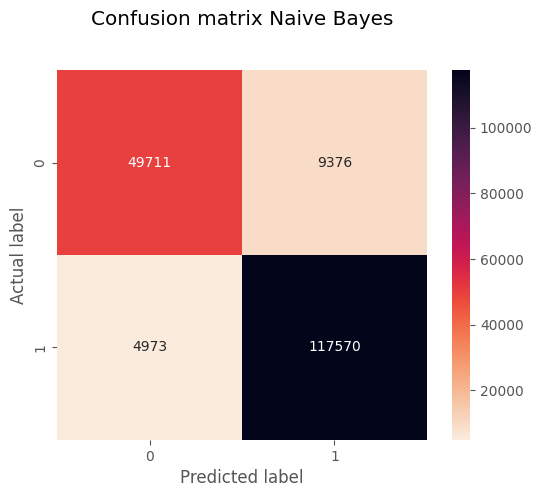

In [15]:
# naive bayes model pipeline
text_naive_bayes = Pipeline([('tfidf', TfidfVectorizer()),
                             ('naive_bayes_clf', MultinomialNB(alpha=0.1)),
                            ])
# fit data
text_naive_bayes.fit(X_train, y_train)
# make prediction
predictions_naive_bayes = text_naive_bayes.predict(X_test)
# overall accuracy, recall, f1, precision, roc
print(metrics.accuracy_score(y_test, predictions_naive_bayes))
print(metrics.classification_report(y_test, predictions_naive_bayes))
fpr_naive_bayes, tpr_naive_bayes, thresholds_naive_bayes = roc_curve(y_test, predictions_naive_bayes)
auc_naive_bayes = auc(fpr_naive_bayes, tpr_naive_bayes)
# confusion matrix
cnf_matrix_naive_bayes = metrics.confusion_matrix(y_test, predictions_naive_bayes)
sns.heatmap(pd.DataFrame(cnf_matrix_naive_bayes), cmap='rocket_r', annot=True, cbar=True, square=True, fmt='g')
plt.title('Confusion matrix Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 1.2.3 Optimal XGBoost evaluation on test data

In [16]:
xboost_best_para

{'eta': 0.6}

0.9413037493806089
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     59087
           1       0.98      0.94      0.96    122543

    accuracy                           0.94    181630
   macro avg       0.93      0.94      0.93    181630
weighted avg       0.94      0.94      0.94    181630



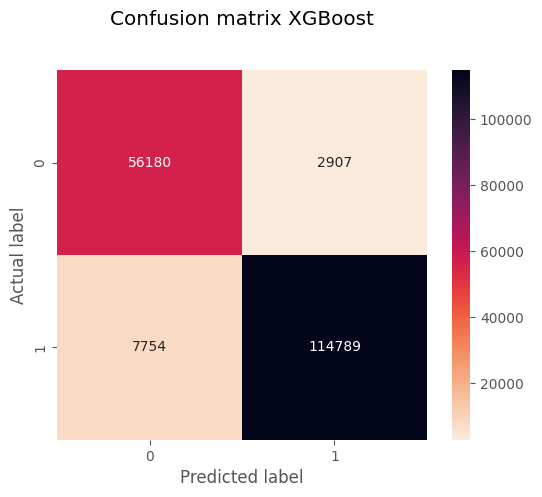

In [17]:
# xboost model pipeline
text_xboost = Pipeline([('tfidf', TfidfVectorizer()),
                        ('xboost_clf', xgb.XGBClassifier(objective="binary:logistic", random_state=42, eta=0.6)),
                       ])
# fit data
text_xboost.fit(X_train, y_train)
# make prediction
predictions_xboost = text_xboost.predict(X_test)
# overall accuracy, recall, f1, precision, roc
print(metrics.accuracy_score(y_test, predictions_xboost))
print(metrics.classification_report(y_test, predictions_xboost))
fpr_xboost, tpr_xboost, thresholds_xboost = roc_curve(y_test, predictions_xboost)
auc_xboost = auc(fpr_xboost, tpr_xboost)
# confusion matrix
cnf_matrix_xboost = metrics.confusion_matrix(y_test, predictions_xboost)
sns.heatmap(pd.DataFrame(cnf_matrix_xboost), cmap='rocket_r', annot=True, cbar=True, square=True, fmt='g')
plt.title('Confusion matrix XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### 1.2.4 Optimal Logistic Regression evaluation on test data

In [18]:
logistic_best_para

{'C': 2}

0.96548477674393
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     59087
           1       0.98      0.96      0.97    122543

    accuracy                           0.97    181630
   macro avg       0.96      0.97      0.96    181630
weighted avg       0.97      0.97      0.97    181630



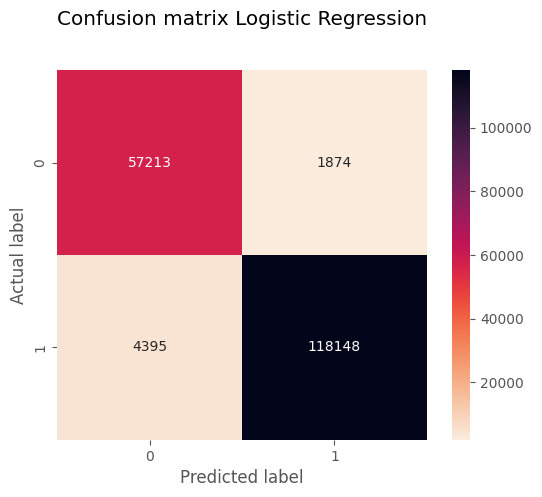

In [19]:
# logistic model pipeline
text_logistic = Pipeline([('tfidf', TfidfVectorizer()),
                          ('logistic_clf', LogisticRegression(solver='newton-cg', penalty='l2', C=2, class_weight='balanced', random_state=0)),
                         ])
# fit data
text_logistic.fit(X_train, y_train)
# make prediction
predictions_logistic = text_logistic.predict(X_test)
# overall accuracy, recall, f1, precision
print(metrics.accuracy_score(y_test, predictions_logistic))
print(metrics.classification_report(y_test, predictions_logistic))
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, predictions_logistic)
auc_logistic = auc(fpr_logistic, tpr_logistic)
# confusion matrix
cnf_matrix_logistic = metrics.confusion_matrix(y_test, predictions_logistic)
sns.heatmap(pd.DataFrame(cnf_matrix_logistic), cmap='rocket_r', annot=True, cbar=True, square=True, fmt='g')
plt.title('Confusion matrix Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### 1.3 Select the trained model with the best performance to use in Part 2.

- Compare ROC and Accuracy

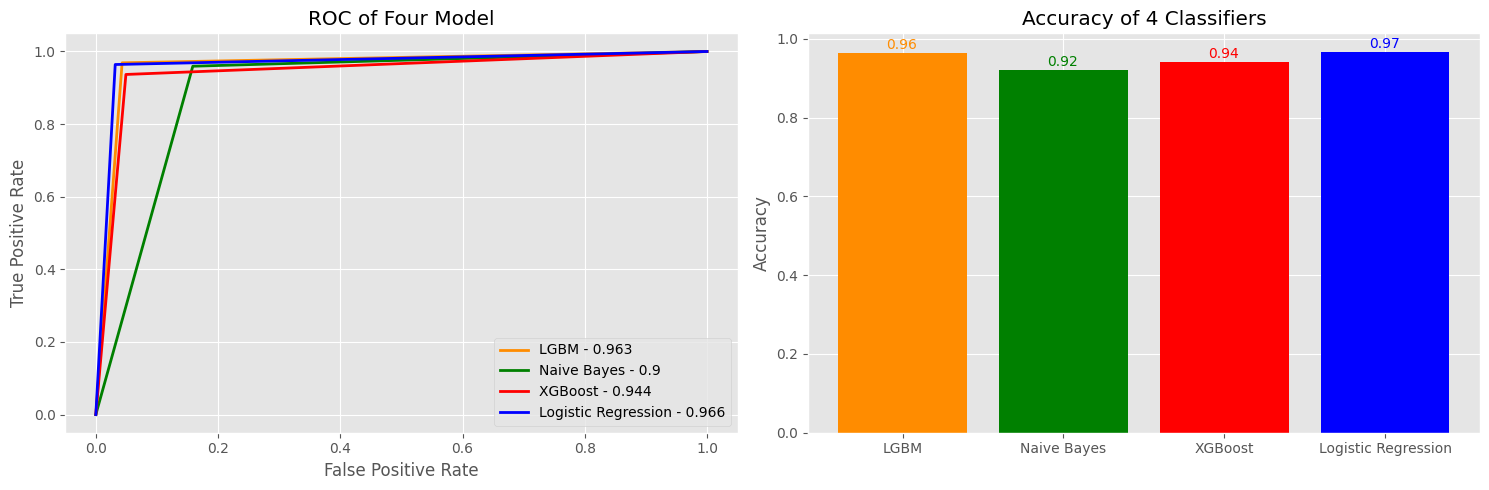

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(fpr_lgbm, tpr_lgbm, color="darkorange", linewidth=2, label = "LGBM - {}".format(round(auc_lgbm,3)))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color="green", linewidth=2, label = "Naive Bayes - {}".format(round(auc_naive_bayes,3)))
plt.plot(fpr_xboost, tpr_xboost, color="red", linewidth=2, label = "XGBoost - {}".format(round(auc_xboost,3)))
plt.plot(fpr_logistic, tpr_logistic, color="blue", linewidth=2, label = "Logistic Regression - {}".format(round(auc_logistic,3)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Four Model")
plt.legend()

acc_x_axis = ['LGBM', 'Naive Bayes', 'XGBoost', 'Logistic Regression']
acc_list = [metrics.accuracy_score(y_test, predictions_lgbm), 
            metrics.accuracy_score(y_test, predictions_naive_bayes),
            metrics.accuracy_score(y_test, predictions_xboost),
            metrics.accuracy_score(y_test, predictions_logistic)]
color = ['darkorange', 'green', 'red', 'blue']
plt.subplot(1,2,2)
plt.bar(acc_x_axis, acc_list, color=color)
for i in range(len(acc_list)):
    plt.text(i-0.1, acc_list[i] + 0.01, '%.2f' % acc_list[i], fontdict={'fontsize':10}, color = color[i])
plt.title('Accuracy of 4 Classifiers')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

- Compare Precision Recall

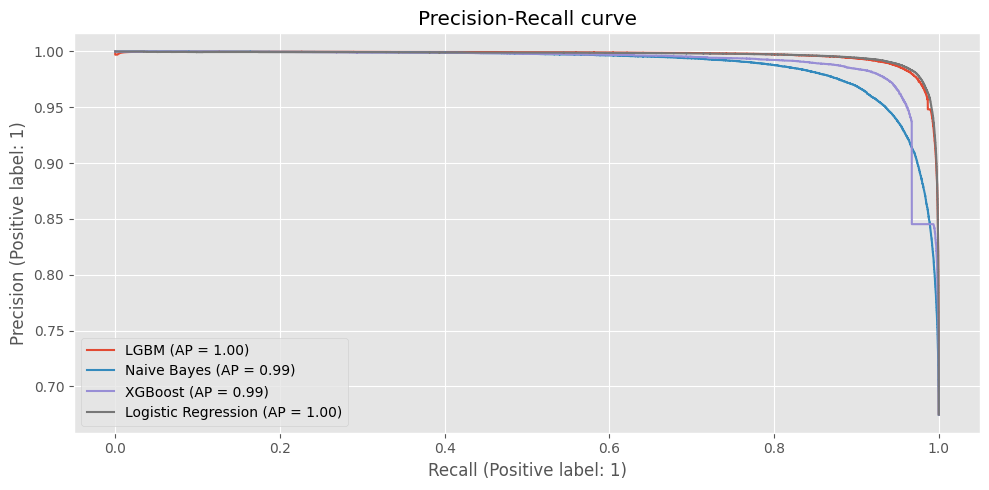

In [21]:
plt.figure(figsize=(10,5))
plot_precision_recall_curve(text_lgbm, X_test, y_test, ax = plt.gca(),name = "LGBM")
plot_precision_recall_curve(text_naive_bayes, X_test, y_test, ax = plt.gca(),name = "Naive Bayes")
plot_precision_recall_curve(text_xboost, X_test, y_test, ax = plt.gca(),name = "XGBoost")
plot_precision_recall_curve(text_logistic, X_test, y_test, ax = plt.gca(),name = "Logistic Regression")
plt.title('Precision-Recall curve')
plt.tight_layout()
plt.show()

In [22]:
print(
'''
From the ROC and Accuracy plot, the performance of the LGBM model is comparable to that of the Logistic Regression model.
From the PR Curve, the performance of the LGBM model is also comparable to that of the Logistic Regression model.
But the inference speed (computation cost) of Logistic Regression model is much faster (smaller) than that of LGBM model.
So Logistic Regression model is the best one.
'''
)


From the ROC and Accuracy plot, the performance of the LGBM model is comparable to that of the Logistic Regression model.
From the PR Curve, the performance of the LGBM model is also comparable to that of the Logistic Regression model.
But the inference speed (computation cost) of Logistic Regression model is much faster (smaller) than that of LGBM model.
So Logistic Regression model is the best one.



## **Part 2 - Sentiment classification:**
Your task is to apply your trained sentiment classification model from Part 1 to datasets related to russia's war in Ukraine. You are also encouraged to use pre-trained sentiment classification models implemented as Python libraries and on-Cloud (AWS, Google Cloud, Microsoft Azure Cloud, IBM Cloud) to compare results of your model from Part 1 with pre-trained models.

You can use datasets and publications suggested here and find your own datasets:
- Opinion of influencers - tweets of Elon Musk and responses to his tweets (posted on Quercus);
- Reddit sentiment analysis https://medium.com/@suhdong21/sentiment-analysis-of-redditcomments-on-russia-ukraine-war-with-python-a3632994942b ;
- Tweets analysis (sentiment, topic, personnel \& resource losses) https://omkargawade.medium.com/russia-ukraine-war-tweets-nlp-analysis-bd10b352316c;
- Conflict detection (pdf file "NLP Conflict Detection in the Ukraine Crisis" posted on Quercus), data sources: Reddit, social news aggregation, etc.

Summarize results of your sentiment classifications for your datasets. For each dataset, make conclusions about your results. Explain those.

- Find new dataset 1
- Find pretrained model and apply to new dataset 1
- Apply trained model from part 1 to new datasets 1
- Results 1 comparison, summary, conclusion and explaination
- Find new dataset 2
- Find pretrained model and apply to new dataset 2
- Apply trained model from part 2 to new datasets 2
- Results 2 comparison, summary, conclusion and explaination

In [23]:
best_model = text_logistic
best_model

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic_clf',
                 LogisticRegression(C=2, class_weight='balanced',
                                    random_state=0, solver='newton-cg'))])

### 2.1 New dataset 1

#### 2.1.1 Find new dataset 1

- New dataset 1 source: https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows?resource=download&select=0819_UkraineCombinedTweetsDeduped.csv.gzip

- New dataset 1 uploaded to Github

- Load new dataset 1

In [24]:
# load data 1
data_new_1 = pd.read_csv('https://media.githubusercontent.com/media/SimonHuang135/MIE1624CP/master/0819_UkraineCombinedTweetsDeduped.csv')
# Keep only the tweet column, all languages
data_new_tweet_all_lang = data_new_1['acctdesc'].dropna() # drop nan in tweet row
data_new_tweet_all_lang = pd.DataFrame(data_new_tweet_all_lang)
# english only (since models are supported by english only)
data_new_tweet_eng = data_new_tweet_all_lang.copy(deep=True)
data_new_tweet_eng = data_new_tweet_eng[data_new_tweet_eng.acctdesc.map(lambda x:x.isascii())]

- All languages data clean

In [25]:
data_new_tweet_all_lang = process_stopwords(data_new_tweet_all_lang, 'acctdesc')
data_new_tweet_all_lang

acctdesc
0      yeshua hamashiach answer roman peace unto jeru...
1      somos el periódico exclusivaspuebla investigac...
2      shelter abandoned dog cat dog cat rescue care ...
3      shelter abandoned dog cat dog cat rescue care ...
4          la mejores noticias de los do laredo el mundo
...                                                  ...
47989          рада всім українцям бо укртві неймовірний
47990         процедурно згенерований мешканець всесвіту
47991  http co hfjqsetk medio de comunicación de los ...
47992  prensa libearia en puebla tienes alguna denunc...
47993  award winning internet writer businessman supp...

[43037 rows x 1 columns]

- English Only data clean

In [26]:
data_new_tweet_eng = process_stopwords(data_new_tweet_eng, 'acctdesc')
data_new_tweet_eng

acctdesc
2      shelter abandoned dog cat dog cat rescue care ...
3      shelter abandoned dog cat dog cat rescue care ...
4          la mejores noticias de los do laredo el mundo
11                   enjoying life awesome family friend
13     nova ukraine nonprofit organization dedicated ...
...                                                  ...
47981  official bmx account mainly focus content crea...
47983                                                cia
47986                                 crypto kid ukraine
47987  hea sure invictus bball spos talk except turk ...
47993  award winning internet writer businessman supp...

[19731 rows x 1 columns]

#### 2.1.2 Pretrained model on new datasets 1

- All Languages
- Pretrained model: SentimentIntensityAnalyzer

In [27]:
# Sentiment Analysis with VADER
Vader_SA_model_all_lang = SentimentIntensityAnalyzer()
Vader_SA_pred_all_lang = [*data_new_tweet_all_lang['acctdesc'].apply(Vader_SA_model_all_lang.polarity_scores)] # predict on new dataset

# load the result into dataframe
neg_list_all_lang, neu_list_all_lang, pos_list_all_lang, compound_list_all_lang = [], [], [], []

for pred in Vader_SA_pred_all_lang:
  neg_list_all_lang.append(pred["neg"]) 
  neu_list_all_lang.append(pred["neu"])
  pos_list_all_lang.append(pred["pos"])
  compound_list_all_lang.append(pred["compound"]) # normalised neg, neu, pos

preds_all_lang = {"neg":neg_list_all_lang, "neu":neu_list_all_lang, "pos":pos_list_all_lang,"compound":compound_list_all_lang}
df_preds_all_lang = pd.DataFrame(data = preds_all_lang)
data_new_tweet_all_lang['compound'] = df_preds_all_lang.compound
data_new_tweet_all_lang = data_new_tweet_all_lang.dropna()

# Generate the label for each comment
THRESHOLD_all_lang = data_new_tweet_all_lang.compound.mean() # use mean = 0.05 to distinguish pos and neg
conditions_all_lang = [(data_new_tweet_all_lang['compound'] < THRESHOLD_all_lang), 
                       (data_new_tweet_all_lang['compound'] >= THRESHOLD_all_lang)]
values_all_lang = ["neg", "pos"]
data_new_tweet_all_lang['Vader_SA_pred'] = np.select(conditions_all_lang, values_all_lang)

# Encode the labels with 1 represent pos, 0 represent neg
data_new_tweet_all_lang["Vader_SA_pred"] = data_new_tweet_all_lang["Vader_SA_pred"].replace("pos", 1)
data_new_tweet_all_lang["Vader_SA_pred"] = data_new_tweet_all_lang["Vader_SA_pred"].replace("neg", 0)

# Clear all unnecessary columns, getting our final df for part 2
data_new_sentiment_all_lang = data_new_tweet_all_lang[["acctdesc","Vader_SA_pred"]]
data_new_sentiment_all_lang = data_new_sentiment_all_lang.rename(columns={'acctdesc': 'Comment', 'Vader_SA_pred': 'Vader_SA_pred'})

- English Only
- Pretrained model: SentimentIntensityAnalyzer

In [28]:
# Sentiment Analysis with VADER
Vader_SA_model_eng = SentimentIntensityAnalyzer()
Vader_SA_pred_eng = [*data_new_tweet_eng['acctdesc'].apply(Vader_SA_model_eng.polarity_scores)] # predict on new dataset

# load the result into dataframe
neg_list_eng, neu_list_eng, pos_list_eng, compound_list_eng = [], [], [], []

for pred in Vader_SA_pred_eng:
  neg_list_eng.append(pred["neg"]) 
  neu_list_eng.append(pred["neu"])
  pos_list_eng.append(pred["pos"])
  compound_list_eng.append(pred["compound"]) # normalised neg, neu, pos

preds_eng = {"neg":neg_list_eng, "neu":neu_list_eng, "pos":pos_list_eng,"compound":compound_list_eng}
df_preds_eng = pd.DataFrame(data = preds_eng)
data_new_tweet_eng['compound'] = df_preds_eng.compound
data_new_tweet_eng = data_new_tweet_eng.dropna()

# Generate the label for each comment
THRESHOLD_eng = data_new_tweet_eng.compound.mean() # use 0.05 to distinguish pos and neg
conditions_eng = [(data_new_tweet_eng['compound'] < THRESHOLD_eng), 
                  (data_new_tweet_eng['compound'] >= THRESHOLD_eng)]
values_eng = ["neg", "pos"]
data_new_tweet_eng['Vader_SA_pred'] = np.select(conditions_eng, values_eng)

# Encode the labels with 1 represent pos, 0 represent neg
data_new_tweet_eng["Vader_SA_pred"] = data_new_tweet_eng["Vader_SA_pred"].replace("pos", 1)
data_new_tweet_eng["Vader_SA_pred"] = data_new_tweet_eng["Vader_SA_pred"].replace("neg", 0)

# Clear all unnecessary columns, getting our final df for part 2
data_new_sentiment_eng = data_new_tweet_eng[["acctdesc","Vader_SA_pred"]]
data_new_sentiment_eng = data_new_sentiment_eng.rename(columns={'acctdesc': 'Comment', 'Vader_SA_pred': 'Vader_SA_pred'})

#### 2.1.3 Apply trained model from part 1 to new datasets 1

- All Languages

In [29]:
# From dataframe: df_new_final get the comment:
new_data_cmt_all_lang = data_new_sentiment_all_lang['Comment']
# Apply trained model from part 1 to new datasets
pred_new_data_logistic_all_lang = best_model.predict(new_data_cmt_all_lang)

- English Only

In [30]:
# From dataframe: df_new_final get the comment:
new_data_cmt_eng = data_new_sentiment_eng['Comment']
# Apply trained model from part 1 to new datasets
pred_new_data_logistic_eng = best_model.predict(new_data_cmt_eng)

- Arrange outputted label from pretrained SentimentIntensityAnalyzer and trained logistic regression model to df

In [31]:
data_new_sentiment_all_lang['LogisticReg_pred'] = pred_new_data_logistic_all_lang # with all lang
data_new_sentiment_eng['LogisticReg_pred'] = pred_new_data_logistic_eng # only eng

#### 2.1.4 Reults 1 comparison, summary, conclusion and explaination

- All Languages

In [32]:
# acc:
Vader_SA_pred_all_lang = data_new_sentiment_all_lang.Vader_SA_pred.tolist()
LogisticReg_pred_all_lang = data_new_sentiment_all_lang.LogisticReg_pred.tolist()
accuracy_score(Vader_SA_pred_all_lang, LogisticReg_pred_all_lang)

0.6308835672997523

- English Only

In [33]:
# acc:
Vader_SA_pred_eng = data_new_sentiment_eng.Vader_SA_pred.tolist()
LogisticReg_pred_eng = data_new_sentiment_eng.LogisticReg_pred.tolist()
accuracy_score(Vader_SA_pred_eng, LogisticReg_pred_eng)

0.5855608293779665

- Distribution plot of Prediction for 2 Models on New Data 1 (All Languages and English Only)
- use matplotlib version of 3.5.0

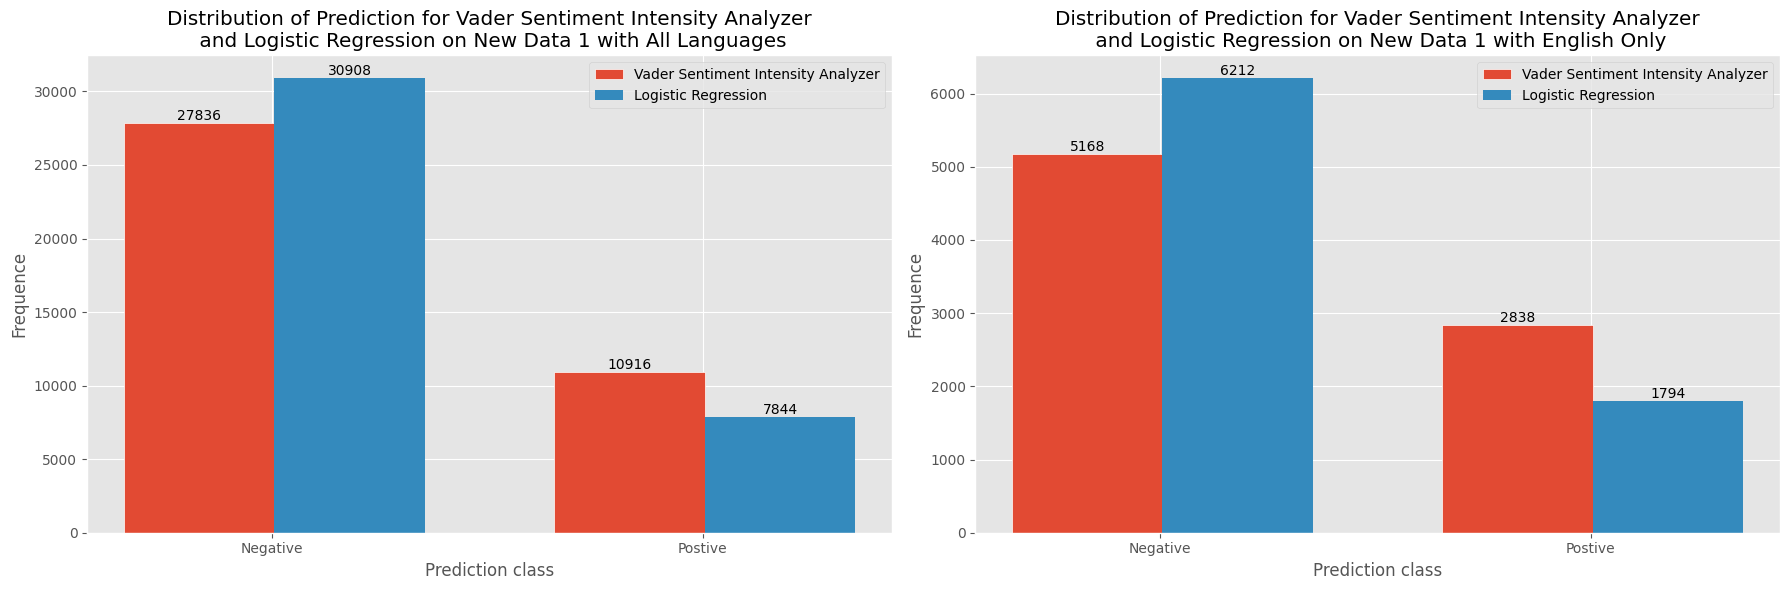

In [34]:
# dist of Vader_SA_pred and LogisticReg_pred_ra with All Languages
freq_Vader_SA_all_lang = data_new_sentiment_all_lang.Vader_SA_pred.value_counts()
freq_LogisticReg_all_lang = data_new_sentiment_all_lang.LogisticReg_pred.value_counts()
# dist of Vader_SA_pred and LogisticReg_pred_ra with English Only
freq_Vader_SA_eng = data_new_sentiment_eng.Vader_SA_pred.value_counts()
freq_LogisticReg_eng = data_new_sentiment_eng.LogisticReg_pred.value_counts()
tick_label = ['Negative','Postive'] 

plt.figure(figsize=(18,6))
# all languages
plt.subplot(1,2,1)
bar1_all_lang = plt.bar(x=np.arange(2), height = freq_Vader_SA_all_lang, width = 0.35, label = 'Vader Sentiment Intensity Analyzer', edgecolor = 'white', tick_label = tick_label)
bar2_all_lang = plt.bar(x=np.arange(2)+0.35 ,height = freq_LogisticReg_all_lang, width = 0.35, label = 'Logistic Regression')
plt.bar_label(bar1_all_lang)
plt.bar_label(bar2_all_lang)
plt.title('Distribution of Prediction for Vader Sentiment Intensity Analyzer\n and Logistic Regression on New Data 1 with All Languages')
plt.xticks(np.arange(2)+0.17, tick_label)
plt.xlabel('Prediction class')
plt.ylabel('Frequence')
plt.legend()

# plot with
plt.subplot(1,2,2)
bar1_eng = plt.bar(x=np.arange(2), height = freq_Vader_SA_eng, width = 0.35, label = 'Vader Sentiment Intensity Analyzer', edgecolor = 'white', tick_label = tick_label)
bar2_eng = plt.bar(x=np.arange(2)+0.35 ,height = freq_LogisticReg_eng, width = 0.35, label = 'Logistic Regression')
# plt.bar(x=[0,1], height=freq_Vader_SA, width = 0.5)
plt.bar_label(bar1_eng)
plt.bar_label(bar2_eng)
plt.title('Distribution of Prediction for Vader Sentiment Intensity Analyzer\n and Logistic Regression on New Data 1 with English Only')
plt.xticks(np.arange(2)+0.17, tick_label)
plt.xlabel('Prediction class')
plt.ylabel('Frequence')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
print(
'''
Reults 1 comparison, summary, conclusion and explaination:

- In Part 2, we find a new dataset from tweets which related to Russia's war in Ukraine. After uploading, we get the true labels 
  from pretrained model (SentimentIntensityAnalyzer) and the predict labels from part 1 trained model (logistic regression model).

- Considering that different languages may have an impact on the prediction results, we have classified our dataset: 
  All languages and English only.
- Reason: SentimentIntensityAnalyzer and Logistic Regression can only supported by English. Therefore, when the non-English 
          language exists in the input data, models will be biased, which leads to wrong judgments. In this condition, we 
          decide to focus on the results of English Only dataset.

- Accuracy score
  - By treating classification of SentimentIntensityAnalyzer as true label, the classification accuracy of Logistic Regression 
    on All Languages dataset is 63% and that on English Only dataset is 58%.
  - Reason: This is because the trained Logistic Regression model does well in that particular group of data (part 1, both training
    and test set), which means the trained Logistic Regression model does not generalize well.

- Distribution plot
  - For both All Languages and English Only dataset, Vader Sentiment Intensity Analyser has more negative prediction than 
    that of Logistic Regression, and also for the posttive prediction.
  - Reason: the training set in part 1, which is used for training the Logistic Regression model, is imbalanced (more than 
            2/3 label is postive). But when constructing Logistic Regression model, balanced weighted class is applied, 
            so both pre-trained and trained model on the new dataset (English Only), we have extreme negetive (most labels
            is 0) condition.
'''
)


Reults 1 comparison, summary, conclusion and explaination:

- In Part 2, we find a new dataset from tweets which related to Russia's war in Ukraine. After uploading, we get the true labels 
  from pretrained model (SentimentIntensityAnalyzer) and the predict labels from part 1 trained model (logistic regression model).

- Considering that different languages may have an impact on the prediction results, we have classified our dataset: 
  All languages and English only.
- Reason: SentimentIntensityAnalyzer and Logistic Regression can only supported by English. Therefore, when the non-English 
          language exists in the input data, models will be biased, which leads to wrong judgments. In this condition, we 
          decide to focus on the results of English Only dataset.

- Accuracy score
  - By treating classification of SentimentIntensityAnalyzer as true label, the classification accuracy of Logistic Regression 
    on All Languages dataset is 63% and that on English Only data

### 2.2 New dataset 2

#### 2.2.1 Find new dataset 2

- New dataset 2 source: Opinion of influencers – tweets of Elon Musk and responses to his tweets

- New dataset 2 uploaded to Github

- Load new dataset 2

In [36]:
# load data 2
data_new_2 = pd.read_csv('https://media.githubusercontent.com/media/SimonHuang135/MIE1624CP/master/tw_reply.csv')

- Data clean

In [37]:
data_new_elontweet = pd.DataFrame(data_new_2['text'].dropna())
data_new_elontweet.text = data_new_elontweet.text.map(lambda x:x.split(' http')[0]) # get rid of website link
for i in range(len(data_new_elontweet)):
    data_new_elontweet.iloc[i] = data_new_elontweet.iloc[i].text.replace('elonmusk',"\b") # get rid of elonmusk word
data_new_elontweet = process_stopwords(data_new_elontweet, 'text') # stop words
data_new_elontweet = data_new_elontweet[data_new_elontweet.text != ''] # get rid of empty row
data_new_elontweet = data_new_elontweet[data_new_elontweet.text.map(lambda x:x.isascii())] # english only
data_new_elontweet

text
0       truly foolish elon life experience taught bett...
1                                                stop war
2       einstein became famous repoers staed interview...
3       ukrainian business russia disagree imperialist...
4       position phenomenal opinion western world issu...
...                                                   ...
336900             akikivirinta already referendum though
336901  akikivirinta exactly type person would caved h...
336902        akikivirinta ukraine ukraine crimea ukraine
336903                         akikivirinta dragon spacex
336904                                        good monday

[292858 rows x 1 columns]

#### 2.2.2 Pretrained model on new datasets 2

- English Only
- Pretrained model: SentimentIntensityAnalyzer

In [38]:
# Sentiment Analysis with VADER
data_new_tweet_elontweet = data_new_elontweet.copy(deep=True)
Vader_SA_model_elontweet = SentimentIntensityAnalyzer()
Vader_SA_pred_elontweet = [*data_new_tweet_elontweet['text'].apply(Vader_SA_model_elontweet.polarity_scores)] # predict on new dataset

# load the result into dataframe
neg_list_elontweet, neu_list_elontweet, pos_list_elontweet, compound_list_elontweet = [], [], [], []

for pred in Vader_SA_pred_elontweet:
  neg_list_elontweet.append(pred["neg"]) 
  neu_list_elontweet.append(pred["neu"])
  pos_list_elontweet.append(pred["pos"])
  compound_list_elontweet.append(pred["compound"]) # normalised neg, neu, pos

preds_elontweet = {"neg":neg_list_elontweet, "neu":neu_list_elontweet, "pos":pos_list_elontweet,"compound":compound_list_elontweet}
df_preds_elontweet = pd.DataFrame(data = preds_elontweet)
data_new_tweet_elontweet['compound'] = df_preds_elontweet.compound
data_new_tweet_elontweet = data_new_tweet_elontweet.dropna()

# Generate the label for each comment
THRESHOLD_elontweet = data_new_tweet_elontweet.compound.mean() # use 0.05 to distinguish pos and neg
conditions_elontweet = [(data_new_tweet_elontweet['compound'] < THRESHOLD_elontweet), 
                        (data_new_tweet_elontweet['compound'] >= THRESHOLD_elontweet)]
values_elontweet = ["neg", "pos"]
data_new_tweet_elontweet['Vader_SA_pred'] = np.select(conditions_elontweet, values_elontweet)

# Encode the labels with 1 represent pos, 0 represent neg
data_new_tweet_elontweet["Vader_SA_pred"] = data_new_tweet_elontweet["Vader_SA_pred"].replace("pos", 1)
data_new_tweet_elontweet["Vader_SA_pred"] = data_new_tweet_elontweet["Vader_SA_pred"].replace("neg", 0)

# Clear all unnecessary columns, getting our final df for part 2
data_new_sentiment_elontweet = data_new_tweet_elontweet[["text","Vader_SA_pred"]]
data_new_sentiment_elontweet = data_new_sentiment_elontweet.rename(columns={'text': 'Comment', 'Vader_SA_pred': 'Vader_SA_pred'})

#### 2.2.3 Apply trained model from part 1 to new datasets 2

- English Only

In [39]:
# From dataframe: df_new_final get the comment:
new_data_cmt_elontweet = data_new_sentiment_elontweet['Comment']
# Apply trained model from part 1 to new datasets
pred_new_data_logistic_elontweet = best_model.predict(new_data_cmt_elontweet)

- Arrange outputted label from pretrained SentimentIntensityAnalyzer and trained logistic regression model to df

In [40]:
data_new_sentiment_elontweet['LogisticReg_pred'] = pred_new_data_logistic_elontweet # only eng

#### 2.2.4 Reults 2 comparison, summary, conclusion and explaination

In [41]:
# acc:
Vader_SA_pred_elontweet = data_new_sentiment_elontweet.Vader_SA_pred.tolist()
LogisticReg_pred_elontweet = data_new_sentiment_elontweet.LogisticReg_pred.tolist()
accuracy_score(Vader_SA_pred_elontweet, LogisticReg_pred_elontweet)

0.4225890824293131

- Distribution plot of Prediction for 2 Models on New Data 2 (English Only)
- use matplotlib version of 3.5.0

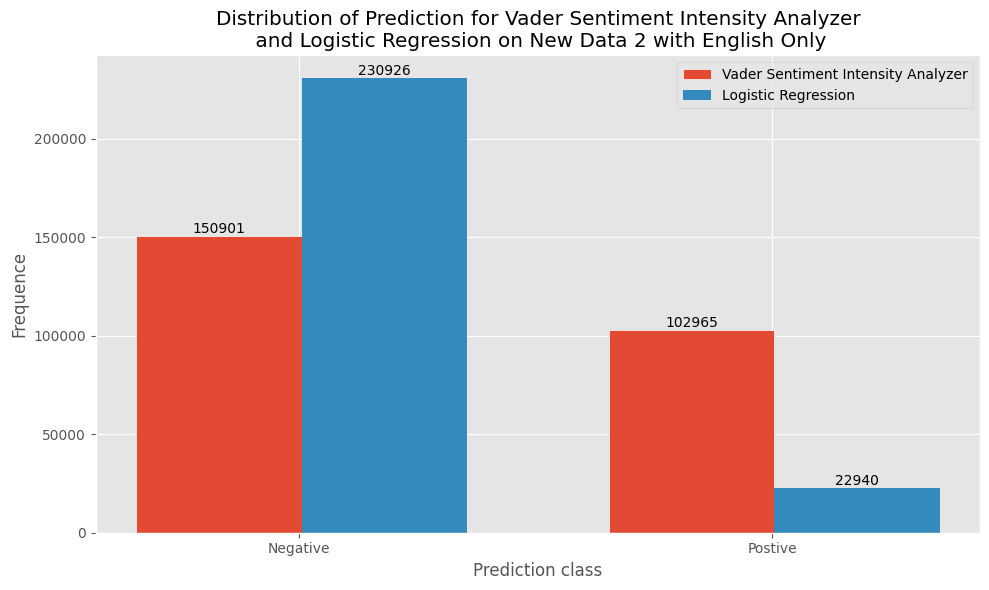

In [42]:
# dist of Vader_SA_pred and LogisticReg_pred_ra with English Only
freq_Vader_SA_elontweet = data_new_sentiment_elontweet.Vader_SA_pred.value_counts()
freq_LogisticReg_elontweet = data_new_sentiment_elontweet.LogisticReg_pred.value_counts()
tick_label = ['Negative','Postive'] 

plt.figure(figsize=(10,6))
bar1_eng = plt.bar(x=np.arange(2), height = freq_Vader_SA_elontweet, width = 0.35, label = 'Vader Sentiment Intensity Analyzer', edgecolor = 'white', tick_label = tick_label)
bar2_eng = plt.bar(x=np.arange(2)+0.35 ,height = freq_LogisticReg_elontweet, width = 0.35, label = 'Logistic Regression')
# plt.bar(x=[0,1], height=freq_Vader_SA, width = 0.5)
plt.bar_label(bar1_eng)
plt.bar_label(bar2_eng)
plt.title('Distribution of Prediction for Vader Sentiment Intensity Analyzer\n and Logistic Regression on New Data 2 with English Only')
plt.xticks(np.arange(2)+0.17, tick_label)
plt.xlabel('Prediction class')
plt.ylabel('Frequence')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
print(
  '''
Reults 2 comparison, summary, conclusion and explaination:

- Comparing the first dataset previously, the Logistic Regression model shows extreme negative output on the second dataset.
  On the other hand, the Vader Sentiment Intensity Analyzer shows relatively balance than the Logistic 's output.

- One possible reason may be because the imbalanced training set of the Logistic Regression model in part 1. 
  However, when processing the second dataset, we found that many comments exhibit strong negative information. 
  So, in this case, the output of the Logistic Regression model is kind reasonable.

- Same as last part, if treats the classifications of VaderSentimentIntensity Analyzer as the true labels, 
  the classification accuracy of Logistic Regression on the Second dataset is 42%. Based on what we discussed above, it does not surprise us.
''')


Reults 2 comparison, summary, conclusion and explaination:

- Comparing the first dataset previously, the Logistic Regression model shows extreme negative output on the second dataset.
  On the other hand, the Vader Sentiment Intensity Analyzer shows relatively balance than the Logistic 's output.

- One possible reason may be because the imbalanced training set of the Logistic Regression model in part 1. 
  However, when processing the second dataset, we found that many comments exhibit strong negative information. 
  So, in this case, the output of the Logistic Regression model is kind reasonable.

- Same as last part, if treats the classifications of VaderSentimentIntensity Analyzer as the true labels, 
  the classification accuracy of Logistic Regression on the Second dataset is 42%. Based on what we discussed above, it does not surprise us.



## **Part 3 - Factor and topics identification via Machine Learning:**
Based on your sentiment analysis results (especially looking at posts/tweets with negative and positive sentiment, as posts/tweets with neutral sentiment are less informative), you will need to identify factors/reasons/topics that drive sentiment. Those are factors (reasons, topics) that explain sentiment and can be used for decision making and recommendations in Part 4. You can use any Natural Language Processing models for this part of the project (use existing models or develop your own).

- Find negative and positive sentiment from results of part 3
- Identify factors by using factor selection model
- Output factors

### 3.1 New dataset 1

#### 3.1.1 Find negative and positive sentiment from results of part 2 - new data 1

In [44]:
# dataset with neg and pos label: data_new_sentiment_eng, please dont make change on it, copy this dataframe and process it (like: data_cpy = data.copy(deep=True))
data_new_sentiment_eng

Comment  Vader_SA_pred  \
2      shelter abandoned dog cat dog cat rescue care ...              0   
3      shelter abandoned dog cat dog cat rescue care ...              1   
4          la mejores noticias de los do laredo el mundo              1   
11                   enjoying life awesome family friend              0   
13     nova ukraine nonprofit organization dedicated ...              0   
...                                                  ...            ...   
19704  tv journalist input head zeebiharnews tweet vi...              0   
19708                         communication professional              0   
19716  retired german climate change social injustice...              0   
19722           trying make putin bum irritable possible              1   
19724  imho always deliberate lie propaganda concealm...              0   

       LogisticReg_pred  
2                     0  
3                     0  
4                     0  
11                    1  
13                    0  
...                 ...  
19704                 0  
19708                 1  
19716                 0  
19722                 0  
19724                 0  

[8006 rows x 3 columns]

- Separate positive and negative results from part 2 - new data 1

In [45]:
# separate positive and negative tweet
positive_tweets = data_new_sentiment_eng[data_new_sentiment_eng['LogisticReg_pred'] == 1]
negative_tweets = data_new_sentiment_eng[data_new_sentiment_eng['LogisticReg_pred'] == 0]

#### 3.1.2 Identify factors by using factor selection model - new data 1

- Function to Identify adj, verb, nouns

In [46]:
def getTextFeature(text):
    adjectives, verbs, nouns = [], [], []
    blob = TextBlob(text)
    for (word,tag) in blob.tags:
        if tag == 'JJ' or tag == 'JJR' or tag == 'JJS':
            adjective = word
            adjectives.append(adjective)
        if tag == 'VB' or tag == 'VBD'or tag == 'VBN'or tag == 'VBG'or tag == 'VBP'or tag == 'VBZ':
            verb = word
            verbs.append(verb)
        if tag == 'NN' or tag == 'NNP'or tag == 'NNS':
            noun = word
            nouns.append(noun)
    return adjectives, verbs, nouns

- Function to identify factors

In [47]:
def factorSelection(text, factor, verbs, adjectives, nouns):
    if factor == "Negative":
        orgscore = Vader_SA_model_eng.polarity_scores(text)
        neg_scoer = orgscore['neg']
		# print("The origninal score is " + str(neg_scoer))

        factor = []
        differences = []
        th = -1
        for word in verbs:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['neg']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                th = difference
                factor.append(word)
                differences.append(difference)

        for word in adjectives:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['neg']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                try:
                    del factor[0]
                except IndexError:
                    factor.append(word)
                try:
                    del differences[0]
                except IndexError:
                    differences.append(difference)
                th = difference
				# factor.append(word)
				# differences.append(difference)
        for word in nouns:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['neg']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                try:
                    del factor[0]
                except IndexError:
                    factor.append(word)
                try:
                    del differences[0]
                except IndexError:
                    differences.append(difference)
                th = difference

    if factor == 'Positive':
        orgscore = Vader_SA_model_eng.polarity_scores(text)
        neg_scoer = orgscore['pos']
        # print("The origninal score is " + str(neg_scoer))

        factor = []
        differences = []
        th = -1
        for word in verbs:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['pos']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                th = difference
                factor.append(word)
                differences.append(difference)

        for word in adjectives:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['pos']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                try:
                    del factor[0]
                except IndexError:
                    factor.append(word)
                try:
                    del differences[0]
                except IndexError:
                    differences.append(difference)
                th = difference
                # factor.append(word)
                # differences.append(difference)
        for word in nouns:
            moditext = text.replace(word,"\b")
            modiscore = Vader_SA_model_eng.polarity_scores(moditext)
            modineg_score = modiscore['pos']
            difference = np.abs(neg_scoer - modineg_score)
            if difference > th:
                try:
                    del factor[0]
                except IndexError:
                    factor.append(word)
                try:
                    del differences[0]
                except IndexError:
                    differences.append(difference)
                th = difference
    return factor

- Identify factors - new data 1

In [48]:
negative_factor = []
for i in range(len(negative_tweets)):
    text = negative_tweets.iloc[i,0]
    adjectives,verbs,nouns = getTextFeature(text)
    factor = factorSelection(text, 'Negative', verbs, adjectives, nouns)
    negative_factor.append(factor)
    
positive_factor = []
for i in range(len(positive_tweets)):
    text = positive_tweets.iloc[i,0]
    adjectives,verbs,nouns = getTextFeature(text)
    factor = factorSelection(text, "Negative", verbs, adjectives, nouns)
    positive_factor.append(factor)

#### 3.1.3 Output factors  - new data 1

- Negative factors from results of part 2 - new data 1

In [49]:
negative_factor_list = []
for fac in negative_factor:
    if len(fac) > 0:
        negative_factor_list.append(fac[0])
# negative_factor_list

- Positive factors from results of part 2 - new data 1

In [50]:
postive_factor_list = []
for fac in positive_factor:
    if len(fac) > 0:
        postive_factor_list.append(fac[0])
# postive_factor_list

### 3.2 New dataset 2

#### 3.2.1 Find negative and positive sentiment from results of part 2 - new data 2

In [51]:
data_new_sentiment_elontweet

Comment  Vader_SA_pred  \
0       truly foolish elon life experience taught bett...              1   
1                                                stop war              0   
2       einstein became famous repoers staed interview...              1   
3       ukrainian business russia disagree imperialist...              1   
4       position phenomenal opinion western world issu...              1   
...                                                   ...            ...   
292853               renatakonkoly path peace appeasement              1   
292854  renatakonkoly petition gained even vote men st...              1   
292855  renatakonkoly go read since look brain cell fo...              1   
292856  renatakonkoly matter many people russia matter...              1   
292857  renatakonkoly wholrme europe unlikely win stro...              1   

        LogisticReg_pred  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
292853                 0  
292854                 0  
292855                 0  
292856                 0  
292857                 0  

[253866 rows x 3 columns]

- Separate positive and negative results from part 2 - new data 2

In [52]:
# separate positive and negative tweet
positive_elontweet = data_new_sentiment_elontweet[data_new_sentiment_elontweet['LogisticReg_pred'] == 1]
negative_elontweet = data_new_sentiment_elontweet[data_new_sentiment_elontweet['LogisticReg_pred'] == 0]

#### 3.2.2 Identify factors by using factor selection model - new data 2

- Identify factors - new data 2

In [53]:
negative_factor_elontweet = []
for i in range(len(negative_elontweet)):
    text = negative_elontweet.iloc[i,0]
    adjectives,verbs,nouns = getTextFeature(text)
    factor = factorSelection(text, 'Negative', verbs, adjectives, nouns)
    negative_factor_elontweet.append(factor)
    
positive_factor_elontweet = []
for i in range(len(positive_elontweet)):
    text = positive_elontweet.iloc[i,0]
    adjectives,verbs,nouns = getTextFeature(text)
    factor = factorSelection(text, "Negative", verbs, adjectives, nouns)
    positive_factor_elontweet.append(factor)

#### 3.2.3 Output factors  - new data 2

- Negative factors from results of part 2 - new data 2

In [54]:
negative_factor_list_elontweet = []
for fac in negative_factor_elontweet:
    if len(fac) > 0:
        negative_factor_list_elontweet.append(fac[0])
# negative_factor_list_elontweet

- Positive factors from results of part 2 - new data 2

In [55]:
postive_factor_list_elontweet = []
for fac in positive_factor_elontweet:
    if len(fac) > 0:
        postive_factor_list_elontweet.append(fac[0])
# postive_factor_list_elontweet

## **Part 4 - Visualizations, storytelling, recommendations:**
Your task is to visualize modeling results obtained in Part 1, 2 and 3. Design visualization(s), e.g., wordclouds, that allows decision makers to grasp public sentiment about Ukraine, sentiment about Russia, sentiment about the war, sentiment about opinions of influencers, etc.

In addition, based on your analysis of social media posts/tweets and identification of key factors/reasons/topics you need to explain how Ukraine is perceived on the international scene and to develop a narrative (storytelling via presentation and report) presenting your findings and your suggestions to the Ukrainian government and international NGOs for changes in their current portfolio of strategies that are projected to have a positive impact on Ukraine's international presence and image. If necessary, you may compliment your analysis of posts/tweets by analyzing news articles from traditional media.

Note: the scope of the question is quite wide, and it is advised that you narrow it down based on your interests and expertise. Make the work truly yours.

- Word cloud visualisation on part 1
- Word cloud visualisation on part 2
- Word cloud visualisation on part 3
- Explain how Ukraine is perceived on the international scene and to develop a narrative (storytelling via presentation and report) presenting your findings
- Suggestions to the Ukrainian government and international NGOs for changes in their current portfolio of strategies that are projected to have a positive impact on Ukraine’s international presence and image.

### 4.1 Word cloud visualisation on part 1

- process word cloud

In [56]:
# prediction on full original data
predictions_logistic = best_model.predict(data.text)
data_cpy = data.copy(deep=True)
data_cpy['logistic_pred'] = predictions_logistic
# locate positive sentiment
pos_sentiment_data = data_cpy[data_cpy.logistic_pred == 1]
# locate negative sentiment
neg_sentiment_data = data_cpy[data_cpy.logistic_pred == 0]
# pos process stopwords
pos_sentiment_data = process_stopwords(pos_sentiment_data, 'text')
pos_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'snail', 'sea', 'monster', 'transponder'
                       ] # delete more stopword
pos_sentiment_data['text'] = pos_sentiment_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in pos_other_stop_words))
# neg process stopwords
neg_sentiment_data = process_stopwords(neg_sentiment_data, 'text')
neg_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'say', 'n', 'new', 'even', 'u'
                       ] # delete more stopword
neg_sentiment_data['text'] = neg_sentiment_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in neg_other_stop_words))
# join to 1 list
pos_text_cloud = " ".join(pos_sentiment_data.text.tolist()) # join all elements in the list, separate with " " (space)
neg_text_cloud = " ".join(neg_sentiment_data.text.tolist()) # like ['a', 'b'] -> ['a b']

- plot

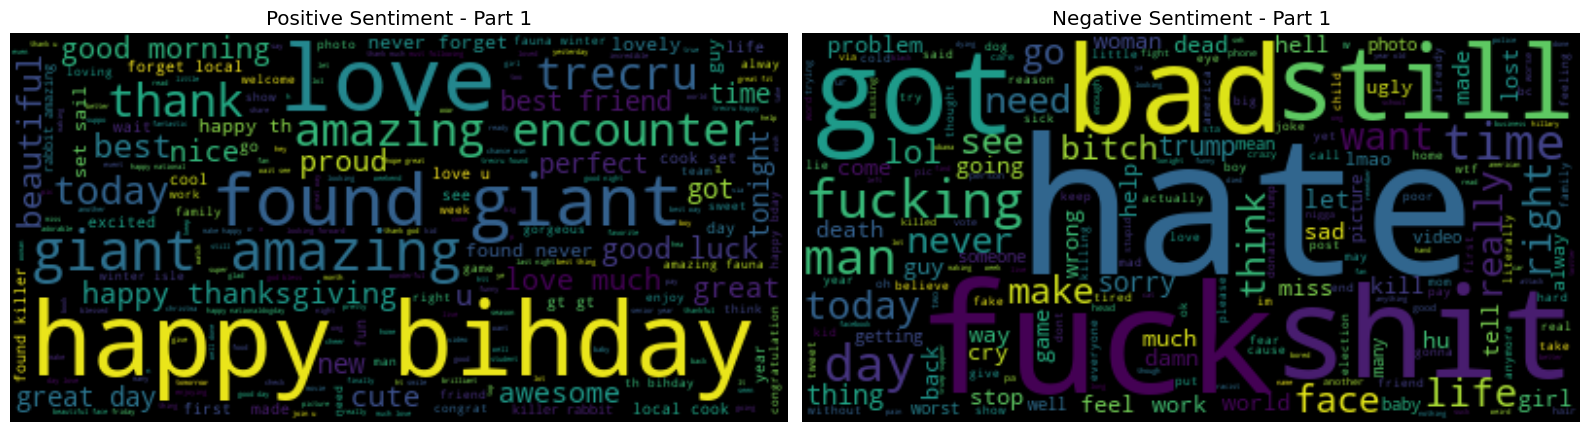

In [57]:
# word cloud on positive sentiment and negative sentiment
wordcloud_pos = WordCloud().generate(pos_text_cloud) 
wordcloud_neg = WordCloud().generate(neg_text_cloud)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment - Part 1')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment - Part 1')
plt.axis("off")

plt.tight_layout()
plt.show()

### 4.2 Word cloud visualisation on part 2

#### 4.2.1 New data 1

- Pretrained model (English Only) - new data 1

In [58]:
data_new_sentiment_eng_copy = data_new_sentiment_eng.copy(deep=True)
# negative_factor_list
neg_sentiment_data_new = data_new_sentiment_eng_copy[data_new_sentiment_eng_copy.Vader_SA_pred == 0]
neg_sentiment_data_new = process_stopwords(neg_sentiment_data_new, 'Comment')
neg_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'say', 'n', 'new', 'even', 'u'
                       ] # delete more stopword
neg_sentiment_data_new['Comment'] = neg_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in neg_other_stop_words))
# postive_factor_list
pos_sentiment_data_new = data_new_sentiment_eng_copy[data_new_sentiment_eng_copy.Vader_SA_pred == 1]
pos_sentiment_data_new = process_stopwords(pos_sentiment_data_new, 'Comment')
pos_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'snail', 'sea', 'monster', 'transponder'
                       ] # delete more stopword
pos_sentiment_data_new['Comment'] = pos_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in pos_other_stop_words))
pos_text_cloud_new = " ".join(pos_sentiment_data_new.Comment.tolist()) # join all elements in the list, separate with " " (space)
neg_text_cloud_new = " ".join(neg_sentiment_data_new.Comment.tolist())

- plot

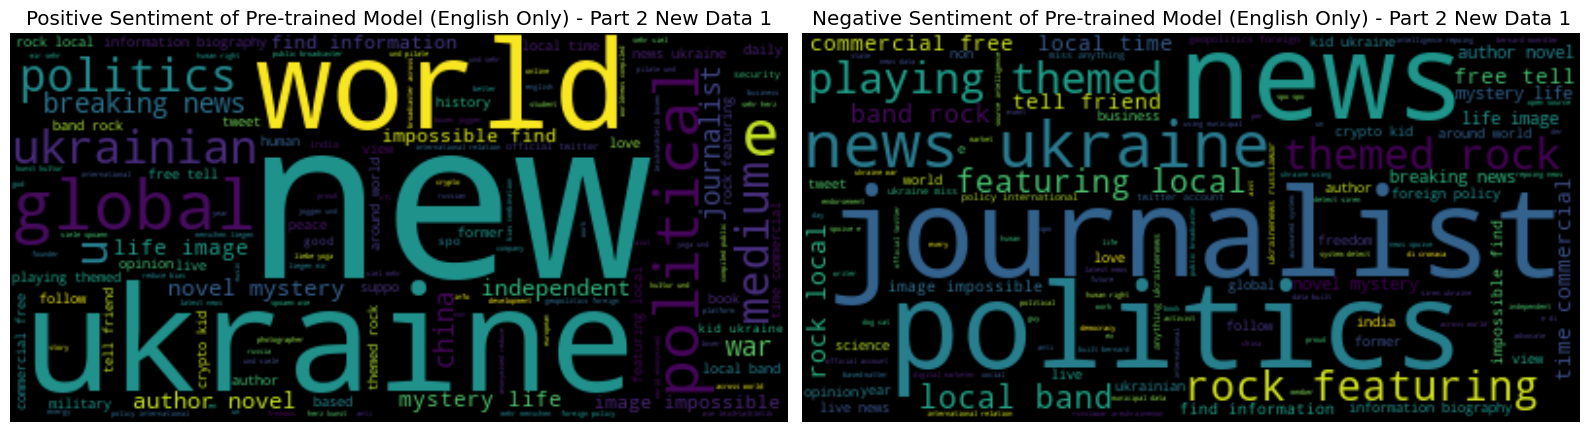

In [59]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_new)
wordcloud_neg = WordCloud().generate(neg_text_cloud_new)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment of Pre-trained Model (English Only) - Part 2 New Data 1')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment of Pre-trained Model (English Only) - Part 2 New Data 1')
plt.axis("off")

plt.tight_layout()
plt.show()

- Trained model (English Only) - new data 1

In [60]:
data_new_sentiment_eng_copy = data_new_sentiment_eng.copy(deep=True)
# negative_factor_list
neg_sentiment_data_new = data_new_sentiment_eng_copy[data_new_sentiment_eng_copy.LogisticReg_pred == 0]
neg_sentiment_data_new = process_stopwords(neg_sentiment_data_new, 'Comment')
neg_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'say', 'n', 'new', 'even', 'u'
                       ] # delete more stopword
neg_sentiment_data_new['Comment'] = neg_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in neg_other_stop_words))
# postive_factor_list
pos_sentiment_data_new = data_new_sentiment_eng_copy[data_new_sentiment_eng_copy.LogisticReg_pred == 1]
pos_sentiment_data_new = process_stopwords(pos_sentiment_data_new, 'Comment')
pos_other_stop_words = ['co', 'rt', 'urt', 'one', 'look', 'know', 'c', 'o', 'r', 't','people',
                        'amp', 'snail', 'sea', 'monster', 'transponder'
                       ] # delete more stopword
pos_sentiment_data_new['Comment'] = pos_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in pos_other_stop_words))
pos_text_cloud_new = " ".join(pos_sentiment_data_new.Comment.tolist()) # join all elements in the list, separate with " " (space)
neg_text_cloud_new = " ".join(neg_sentiment_data_new.Comment.tolist())

- plot

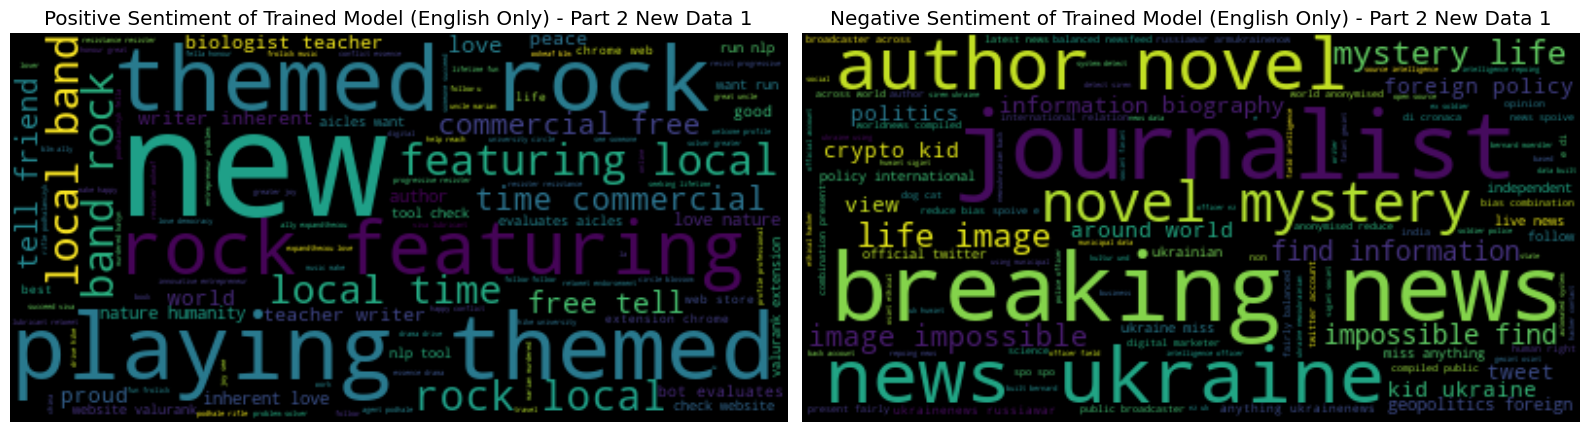

In [61]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_new)
wordcloud_neg = WordCloud().generate(neg_text_cloud_new)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment of Trained Model (English Only) - Part 2 New Data 1')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment of Trained Model (English Only) - Part 2 New Data 1')
plt.axis("off")

plt.tight_layout()
plt.show()

#### 4.2.2 New data 2

- Pretrained model (English Only) - new data 2

In [62]:
data_new_sentiment_elontweet_copy = data_new_sentiment_elontweet.copy(deep=True)
# negative_factor_list
neg_sentiment_data_new = data_new_sentiment_elontweet_copy[data_new_sentiment_elontweet_copy.Vader_SA_pred == 0]
neg_sentiment_data_new = process_stopwords(neg_sentiment_data_new, 'Comment')
neg_other_stop_words = ['putin', 'lindseygrahamsc', 'elon', 'ukraine', 'zelenskyyua', 'russia', 'one', 'musk', 'russian',
                        'people', 'u', 'ukrainian', 'vote', 'think', 'renatakonkoly', 'war', 'country', 'know', 'right',
                        'want', 'world', 'peace', 'need', 'even', 'say', 'make'
                       ] # delete more stopword
neg_sentiment_data_new['Comment'] = neg_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in neg_other_stop_words))
# postive_factor_list
pos_sentiment_data_new = data_new_sentiment_elontweet_copy[data_new_sentiment_elontweet_copy.Vader_SA_pred == 1]
pos_sentiment_data_new = process_stopwords(pos_sentiment_data_new, 'Comment')
pos_other_stop_words = ['putin', 'lindseygrahamsc', 'elon', 'u', 'ukraine', 'zelenskyyua', 'russia', 'russian', 'one',
                        'musk', 'ukrainian', 'people', 'vote', 'think', 'renatakonkoly', 'war', 'country', 'know', 'fuck',
                        'right', 'want', 'world', 'need', 'even', 'say', 'make'
                       ] # delete more stopword
pos_sentiment_data_new['Comment'] = pos_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in pos_other_stop_words))
pos_text_cloud_new = " ".join(pos_sentiment_data_new.Comment.tolist()) # join all elements in the list, separate with " " (space)
neg_text_cloud_new = " ".join(neg_sentiment_data_new.Comment.tolist())

- plot

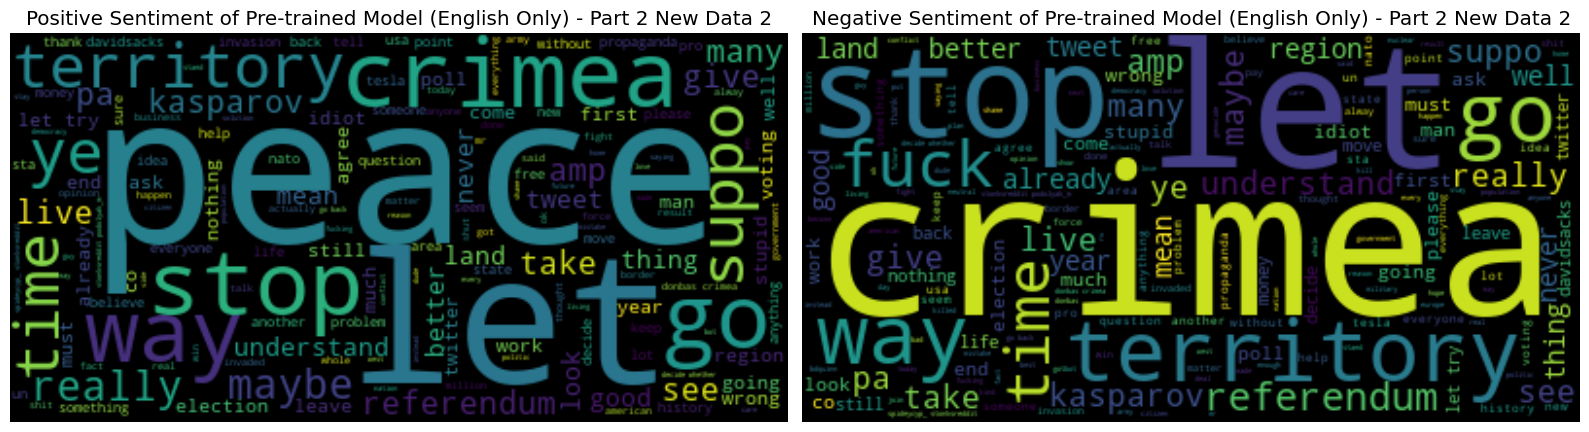

In [63]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_new)
wordcloud_neg = WordCloud().generate(neg_text_cloud_new)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment of Pre-trained Model (English Only) - Part 2 New Data 2')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment of Pre-trained Model (English Only) - Part 2 New Data 2')
plt.axis("off")

plt.tight_layout()
plt.show()

- Trained model (English Only) - new data 2

In [64]:
data_new_sentiment_elontweet_copy = data_new_sentiment_elontweet.copy(deep=True)
# negative_factor_list
neg_sentiment_data_new = data_new_sentiment_elontweet_copy[data_new_sentiment_elontweet_copy.LogisticReg_pred == 0]
neg_sentiment_data_new = process_stopwords(neg_sentiment_data_new, 'Comment')
neg_other_stop_words = ['putin', 'lindseygrahamsc', 'elon', 'ukraine', 'zelenskyyua', 'russia', 'one', 'musk', 'russian',
                        'people', 'u', 'ukrainian', 'vote', 'think', 'renatakonkoly', 'war', 'country', 'know',
                        'want', 'world', 'peace', 'need', 'even', 'say', 'make', 'right'
                       ] # delete more stopword
neg_sentiment_data_new['Comment'] = neg_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in neg_other_stop_words))
# postive_factor_list
pos_sentiment_data_new = data_new_sentiment_elontweet_copy[data_new_sentiment_elontweet_copy.LogisticReg_pred == 1]
pos_sentiment_data_new = process_stopwords(pos_sentiment_data_new, 'Comment')
pos_other_stop_words = ['putin', 'lindseygrahamsc', 'elon', 'u', 'ukraine', 'zelenskyyua', 'russia', 'russian', 'one',
                        'musk', 'ukrainian', 'people', 'vote', 'think', 'renatakonkoly', 'war', 'country', 'know', 'fuck',
                        'co', 'ye', 'right', 'want', 'world', 'need', 'even', 'say', 'make'
                       ] # delete more stopword
pos_sentiment_data_new['Comment'] = pos_sentiment_data_new['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in pos_other_stop_words))
pos_text_cloud_new = " ".join(pos_sentiment_data_new.Comment.tolist()) # join all elements in the list, separate with " " (space)
neg_text_cloud_new = " ".join(neg_sentiment_data_new.Comment.tolist())

- plot

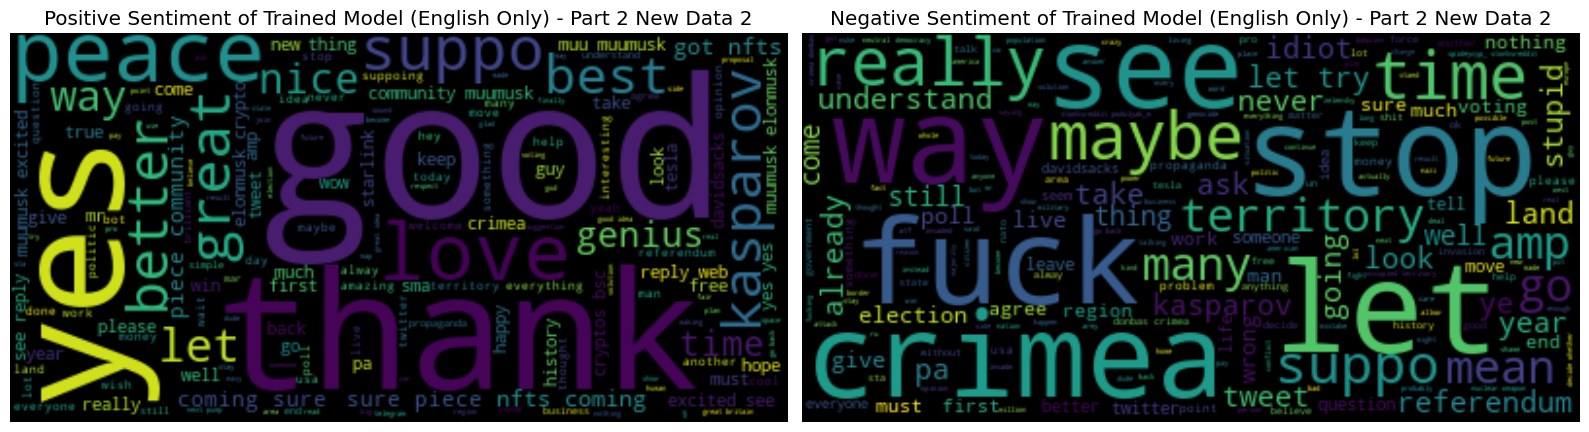

In [65]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_new)
wordcloud_neg = WordCloud().generate(neg_text_cloud_new)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment of Trained Model (English Only) - Part 2 New Data 2')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment of Trained Model (English Only) - Part 2 New Data 2')
plt.axis("off")

plt.tight_layout()
plt.show()

### 4.3 Word cloud visualisation on part 3

#### 4.3.1 New data 1

- new data 1

In [66]:
pos_text_cloud_p3 = " ".join(postive_factor_list) # join all elements in the list, separate with " " (space)
neg_text_cloud_p3 = " ".join(negative_factor_list)

- plot

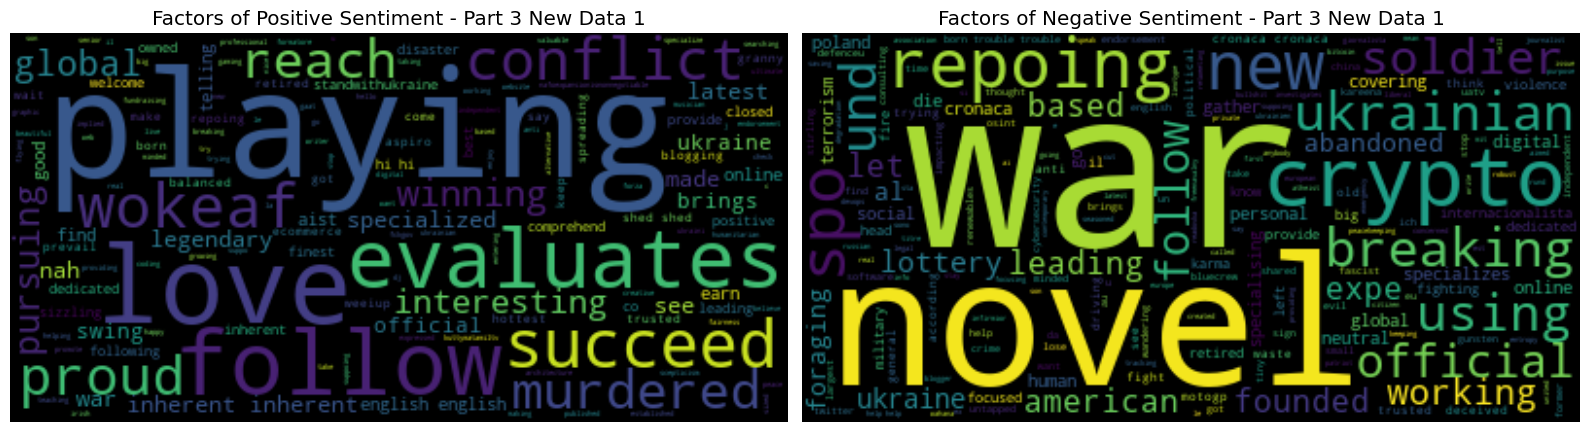

In [67]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_p3)
wordcloud_neg = WordCloud().generate(neg_text_cloud_p3)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Factors of Positive Sentiment - Part 3 New Data 1')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Factors of Negative Sentiment - Part 3 New Data 1')
plt.axis("off")

plt.tight_layout()
plt.show()

#### 4.3.2 New data 2

- new data 2

In [68]:
pos_text_cloud_p3 = " ".join(postive_factor_list_elontweet) # join all elements in the list, separate with " " (space)
neg_text_cloud_p3 = " ".join(negative_factor_list_elontweet)

- plot

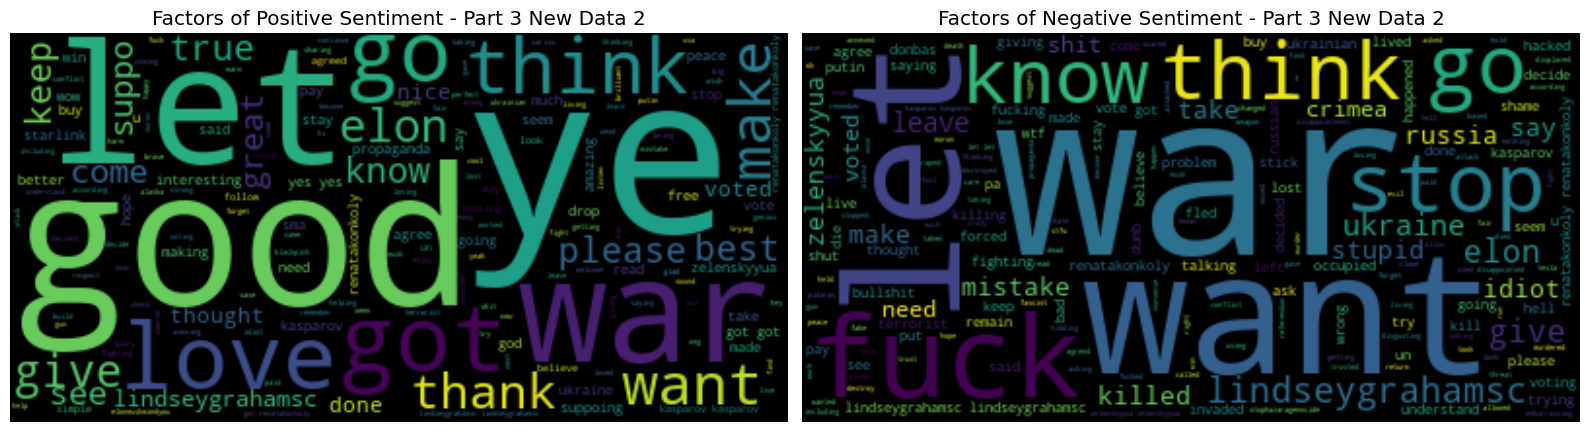

In [69]:
wordcloud_pos = WordCloud().generate(pos_text_cloud_p3)
wordcloud_neg = WordCloud().generate(neg_text_cloud_p3)
# plot
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Factors of Positive Sentiment - Part 3 New Data 2')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Factors of Negative Sentiment - Part 3 New Data 2')
plt.axis("off")

plt.tight_layout()
plt.show()

### 4.4 Explain how Ukraine is perceived on the international scene and to develop a narrative (storytelling via presentation and report) presenting your findings

In [70]:
print(
'''
- On Feb 24th, 2022, Russia started to Invade Ukraine, this is not the starting point of the Russia-Ukraine war, 
  the beginning of this war was in 2014, but the escalation of this war caused Europe's largest refugee crisis 
  since World War II. From the current situation, this war is very likely to be a turning point in human destiny, 
  as soon as the invasion happens, the invasion widespread international condemnation, and demonstrations against 
  war and invasion erupted all over the world. 

- From our analysis of social media posts/tweets and identification of the key factors above, we can find that in 
  the word clouds of Figs from Part 2-3 regarding the comments on Russia and Ukraine war on Twitter, we observe that 
  negative sentiments are characterized by the words like “war”, “impossible”, “politics”, “terrorism” and “journalist”, 
  and positive sentiments go typically with “love”, “happy”, “amazing”, “great”, “thank”, “peace”, “playing” and “succeed”. 
  Where those negative sentiments are driven by factors such as “war”, “Ukraine”, and "soldiers”. Those negative words and 
  factors seem all about the war between Ukraine and Russia and may represent people’s negative reactions and viewpoints 
  of the war. Many people around the world are against the war and support Ukraine in a way of commenting on the Internet 
  like Twitter to vent their anger and protest and host demonstrations. The positive words are more expressing positive 
  comments which might indicate people want the world to return to peace and expect the war to come to an end as quickly 
  as possible. 

- Obviously, during the war, Ukraine is perceived as a victim and a motherland defender, which is evidenced in the way 
  that more people protest against the war,  support Ukraine as the war defender, and have sympathy for the brave Ukrainian 
  people. From now on, Ukraine has become a focal point of all the other countries in the world, since this war involves not
  only Ukraine and Russia, it also the effect from European Union, countries in the European Union are supporting Ukraine by 
  implementing economic sanctions against Russia and supporting weapons and supplies to Ukraine. Hence Ukraine nowadays has 
  become the symbol of anti-aggression whether for big countries or small countries in the world, the direction of the war has 
  attracted the attention of countless people, and the situation in Ukraine has also been cared for by people all over the world.
'''
)


- On Feb 24th, 2022, Russia started to Invade Ukraine, this is not the starting point of the Russia-Ukraine war, 
  the beginning of this war was in 2014, but the escalation of this war caused Europe's largest refugee crisis 
  since World War II. From the current situation, this war is very likely to be a turning point in human destiny, 
  as soon as the invasion happens, the invasion widespread international condemnation, and demonstrations against 
  war and invasion erupted all over the world. 

- From our analysis of social media posts/tweets and identification of the key factors above, we can find that in 
  the word clouds of Figs from Part 2-3 regarding the comments on Russia and Ukraine war on Twitter, we observe that 
  negative sentiments are characterized by the words like “war”, “impossible”, “politics”, “terrorism” and “journalist”, 
  and positive sentiments go typically with “love”, “happy”, “amazing”, “great”, “thank”, “peace”, “playing” and “succeed”. 
  Where those 

### 4.5 Suggestions to the Ukrainian government and international NGOs for changes in their current portfolio of strategies that are projected to have a positive impact on Ukraine’s international presence and image.

In [71]:
print(
'''
- The most efficient way to restore the positive image of Ukraine’s international presence is to end the war by winning as 
  soon as possible, however, it cannot achieve easily by only Ukraine, which means the government of Ukraine needs to change
  the policies to achieve public opinion control, in order to let more people pay attention to this war, when there are more 
  international condemnations against Russia, Russia will be harder to conduct operations in Ukraine. 

- First of all, likely the most important one, it is necessary to minimize the image of Ukraine as a poor victim but to strengthen 
  the image of being full of power, courage, and justice. Ukraine is not a weak country and the Ukrainian army has the power to 
  protect its nation and people. This is one important way to further enhance Ukraine’s reputation. With worldwide military support, 
  Ukraine will eventually get victory over Russia and celebrate the liberation of Russian-occupied territories.

- Secondly, it could be helpful to ask journalists to report some heart-touching stories of war heroes such as soldiers, doctors, or 
  filming war documentaries to publish on internet. This can encourage the Ukrainian army, bring more international support, and help 
  build a positive image of Ukraine's international presence.

- Thirdly, propagating the resistance of the domestic people to the war, the determination of the whole people to unite in the war of
  resistance, treating Russian prisoners well, and constantly negotiating with Russia to find a way to reach a consensus between the 
  two sides to end the war as soon as possible. Constantly publicize to the international community the stability and unity within 
  Ukraine and the yearning for a peaceful life.
'''
)


- The most efficient way to restore the positive image of Ukraine’s international presence is to end the war by winning as 
  soon as possible, however, it cannot achieve easily by only Ukraine, which means the government of Ukraine needs to change
  the policies to achieve public opinion control, in order to let more people pay attention to this war, when there are more 
  international condemnations against Russia, Russia will be harder to conduct operations in Ukraine. 

- First of all, likely the most important one, it is necessary to minimize the image of Ukraine as a poor victim but to strengthen 
  the image of being full of power, courage, and justice. Ukraine is not a weak country and the Ukrainian army has the power to 
  protect its nation and people. This is one important way to further enhance Ukraine’s reputation. With worldwide military support, 
  Ukraine will eventually get victory over Russia and celebrate the liberation of Russian-occupied territories.

- Secondly, 